In [215]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import evo
from evo.tools import plot
from evo.core import metrics
from evo.core.units import Unit
from evo.core import sync

import g2o_and_time_to_pose_data as gt2pd

In [216]:
# dataset = "tunnels"
# robots = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth', 'apis', 'sobek'] \
#     if dataset == "hybrid" or dataset == "tunnels" else \
#     ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth']
# kmd_gt_csv = f"/home/masonbp/data/kimera_multi/{dataset}/gt"

# # outdoor

# # time_file = "/home/masonbp/results/segment_track/kmd_outdoor/05_clip_6Hz/g2o/time_2m.txt"
# # g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoor/05_clip_6Hz/00_semanticvolgrav/result_sparse_5.g2o"

# # time_file = "/home/masonbp/results/segment_track/kmd_tunnels/05_clip_6Hz/g2o/time_2m.txt"
# # g2o_file = "/home/masonbp/results/offline_rpgo/kmd_tunnels/05_clip_6Hz/00_semanticvolgrav/result_sparse_6.g2o"

# # time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/05_clip_6Hz/g2o/time_2m.txt"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/05_clip_6Hz/00_semanticvolgrav/odom_0.15_lc_2.0/result_sparse_6.g2o"

# ############## Hybrid

# # time_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/time.txt"
# # g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/result.g2o"

# # time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# # g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/00/00_evg/odom_0.2_lc_2.5/result_sparse_7.g2o"

# # time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# # g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_object_lc/00/result_sparse_7.g2o"

# ############## General

# time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/09_6Hz_voxel0.2/g2o/time_2m.txt"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/09_6Hz_voxel0.2/spvg_min_cos_0.85/odom_0.2x5_lc_1.0x5/result_sparse_5.g2o"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/09_6Hz_voxel0.2/spvg_eps_0.1/odom_0.1x5_lc_1.0x1/result_sparse_4.g2o"
# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/09_6Hz_voxel0.2/spvg_min_cos_0.85/odom_0.1x5_lc_1.0/result_sparse_4.g2o"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/09_6Hz_voxel0.2/result_sparse_4.g2o"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/combined/result_4.g2o"
# # time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/05_clip_6Hz/g2o/time_2m.txt"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/05_clip_6Hz/00_semanticvolgrav/odom_0.2_lc_2.0/result_sparse_5.g2o"

# ############## Coarse Visual

# # time_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/time.txt"
# # # 
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/result.g2o"
# # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse_object/05_clip_6Hz/odom_0.1/result_6.g2o"

# pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

In [217]:
dataset = "outdoor"
lc_method = "roman"
robots = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth', 'apis', 'sobek'] \
    if dataset == "hybrid" or dataset == "tunnels" else \
    ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth']
kmd_gt_csv = f"/home/masonbp/data/kimera_multi/{dataset}/gt"


if lc_method == "roman":
    time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/09_6Hz_voxel0.2/g2o/time_2m.txt"
    g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/09_6Hz_voxel0.2/spvg_min_cos_0.85/odom_0.1x5_lc_1.0/result_sparse_4.g2o"
    # g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/09_6Hz_voxel0.2/result_sparse_4.g2o"
elif lc_method == "combined":
    time_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/time.txt"
    g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/combined/result_4.g2o"
elif lc_method == "visual":
    time_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/time.txt"
    g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/result.g2o"

pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

In [218]:
subgroup = False
lc_method = "roman"
robot_group = ""

dataset = "outdoor"
default_robots = ['acl_jackal2', 'sparkal1']

if subgroup:

    if robot_group == "outdoor:s1/s2":
        dataset = "outdoor"
        robots = ['sparkal1', 'sparkal2']
        idxs = [2, 3]
        group_short = "sparkal1_sparkal2"
    if robot_group == "outdoor:a/t":
        dataset = "outdoor"
        robots = ['acl_jackal', 'thoth']
        idxs = [0, 5]
        group_short = "acl_jackal_thoth"
    if robot_group == "aj2/s1/s2":
        robots = ['acl_jackal2', 'sparkal1', 'sparkal2']
        idxs = [1, 2, 3]
        group_short = "aj2_s1_s2"
    else:
        robots_all = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth', 'apis', 'sobek']
        robots = default_robots
        idxs = [robots_all.index(default_robots[i]) for i in range(len(default_robots))]
        group_short = '_'.join(default_robots)

    kmd_gt_csv = f"/home/masonbp/data/kimera_multi/{dataset}/gt"
    
    if lc_method == "roman":
        time_file = f"/home/masonbp/results/segment_track/kmd_{dataset}/09_6Hz_voxel0.2/g2o/time_2m.txt"
        g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/09_6Hz_voxel0.2/{group_short}/result_sparse_4.g2o"
    elif lc_method == "visual":
        time_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/time.txt"
        g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/{group_short}/result.g2o"
    elif lc_method == "combined":
        time_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/visual_coarse/time.txt"
        g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_paper/{dataset}/combined/{group_short}/result_4.g2o"

    pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {idx: f"{kmd_gt_csv}/{robots[i]}.csv" for i, idx in enumerate(idxs)})




In [219]:
# print(pd_est.t0 - pd_gt.t0)
# print(pd_est.tf - pd_gt.tf)

# pd_est.plot2d(t=pd_est.times[::10])
# plt.show()

# pd_gt.plot2d(t=pd_gt.times[::30])
# plt.show()

In [220]:
traj_ref = pd_gt.to_evo()
traj_est = pd_est.to_evo()

max_diff = 0.1

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

(array([[-0.95145908,  0.30431438,  0.04602577],
        [-0.30773151, -0.94314775, -0.12559312],
        [ 0.00518931, -0.1336603 ,  0.99101362]]),
 array([372.88635048, -45.10854807,   2.55305717]),
 1.0)

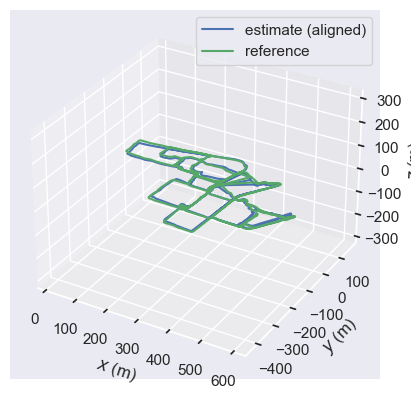

In [221]:
fig = plt.figure()
traj_by_label = {
    # "estimate (not aligned)": traj_est,
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()

In [222]:
pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True

In [223]:
if use_aligned_trajectories:
    data = (traj_ref, traj_est_aligned) 
else:
    data = (traj_ref, traj_est)

In [224]:
ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

In [225]:
ape_stat = ape_metric.get_statistic(metrics.StatisticsType.rmse)
print(ape_stat)

8.76751237615663


In [226]:
ape_stats = ape_metric.get_all_statistics()
for stat_key, stat_value in ape_stats.items():
    print(f"{stat_key}:\n{stat_value}")

rmse:
8.76751237615663
mean:
7.613967202418657
median:
6.539258124352374
std:
4.347042294083727
min:
0.7329166377577486
max:
24.510707142747513
sse:
205010.35180058118
